# Project Proposal: Group 59
### Jin Kim, Emily Ishii, Natasha Larin, Syed Haque

### Introduction

For our DSCI 100 Project, our group will be using the data found in the "processed.cleveland.data" file in the Heart Disease dataset directory. This dataset is composed of 14 fields:

* Age of patient (age) - years
* Sex of the patient (sex)
    * 1 = Male
    * 2 = Female
* Chest pain type (cp)
    * 1 = Typical Angina
    * 2 = Atypical Angina
    * 3 = Non-aginal Pain
    * 4 = Asymptomatic
* Blood preassure (trestbps) - mm Hg
* Serum cholestoral (chol) - mg/dl
* Fasting blood sugar > 120 mg/dl (fbs) - true or false
* Resting ECG results (restecg)
    * 0 = Normal
    * 1 = Abnormal
    * 2 = Probable or definite left ventricular hypertrophy
* Maximum heart rate achieved (thalach) - bpm
* Excercize induced agina (exang)
    * 0 = No
    * 1 = Yes
* Depression induced by excercize related to rest (oldpeak)
* Slope of the peake excercise segment (slope)
* Number of major vessels (ca)
* Condition (thal)
    * 3 = Normal
    * 6 = fixed defect
    * 7 = reversable defect
* Diagnosis of heart disease (num)
    * idk what the numbers mean
    
These fields are parts of a patient's health report, so they can be used to predict the severity or existence of heart disease within a patient, which is what variable **num** represents.

The question that we will be exploring is: **Which factors are most influential towards the cause of heart disease?**

### Preliminary Exploratory Data Analysis

In [19]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)

**Reading in, tidying, and splitting the dataset**

In [41]:
names <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
patient_data <- read_csv("data/processed.cleveland.data", col_names = names) |>
    mutate(num = as_factor(num)) |>
    mutate(cp = as_factor(cp)) |>
    mutate(sex = as_factor(sex)) |>
    mutate(exang = as_factor(exang)) |>
    mutate(slope = as_factor(slope)) |>
    mutate(restecg = as_factor(restecg)) |>
    mutate(ca = as_factor(ca)) |>
    mutate(thal = as_factor(thal)) |>
    mutate(fbs = as.logical(fbs)) |>
    select(age, trestbps, chol, thalach, oldpeak, num) # Since we are classifying using these variables, we should select only continuous variables (data of type double)


patient_split <- initial_split(patient_data, prop = 0.75, strata = num)
training_data <- training(patient_split)
testing_data <- testing(patient_split)

training_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,trestbps,chol,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
37,130,250,187,3.5,0
41,130,204,172,1.4,0
57,120,354,163,0.6,0
57,140,192,148,0.4,0
56,140,294,153,1.3,0
44,120,263,173,0.0,0
52,172,199,162,0.5,0
48,130,275,139,0.2,0
49,130,266,171,0.6,0


**Summarizing the training dataset**

In [42]:
data_mean <- training_data |>
    select(-num) |>
    map_df(mean) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "mean") |>
    select(-predictor)
data_max <- training_data |>
    select(-num) |>
    map_df(max) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "max")
data_min <- training_data |>
    select(-num) |>
    map_df(min) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "min") |>
    select(-predictor)
data_median <- training_data |>
    select(-num) |>
    map_df(median) |>
    pivot_longer(cols = age:oldpeak,
               names_to = "predictor",
               values_to = "median") |>
    select(-predictor)
training_data_summary <- bind_cols(data_max, data_min, data_mean, data_median)
training_data_summary

predictor,max,min,mean,median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
age,77.0,29,54.226667,55.0
trestbps,180.0,94,130.600000,130.0
chol,564.0,149,249.048889,243.0
thalach,202.0,71,150.671111,155.0
oldpeak,5.6,0,1.024889,0.8


**Visualizing the training dataset**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



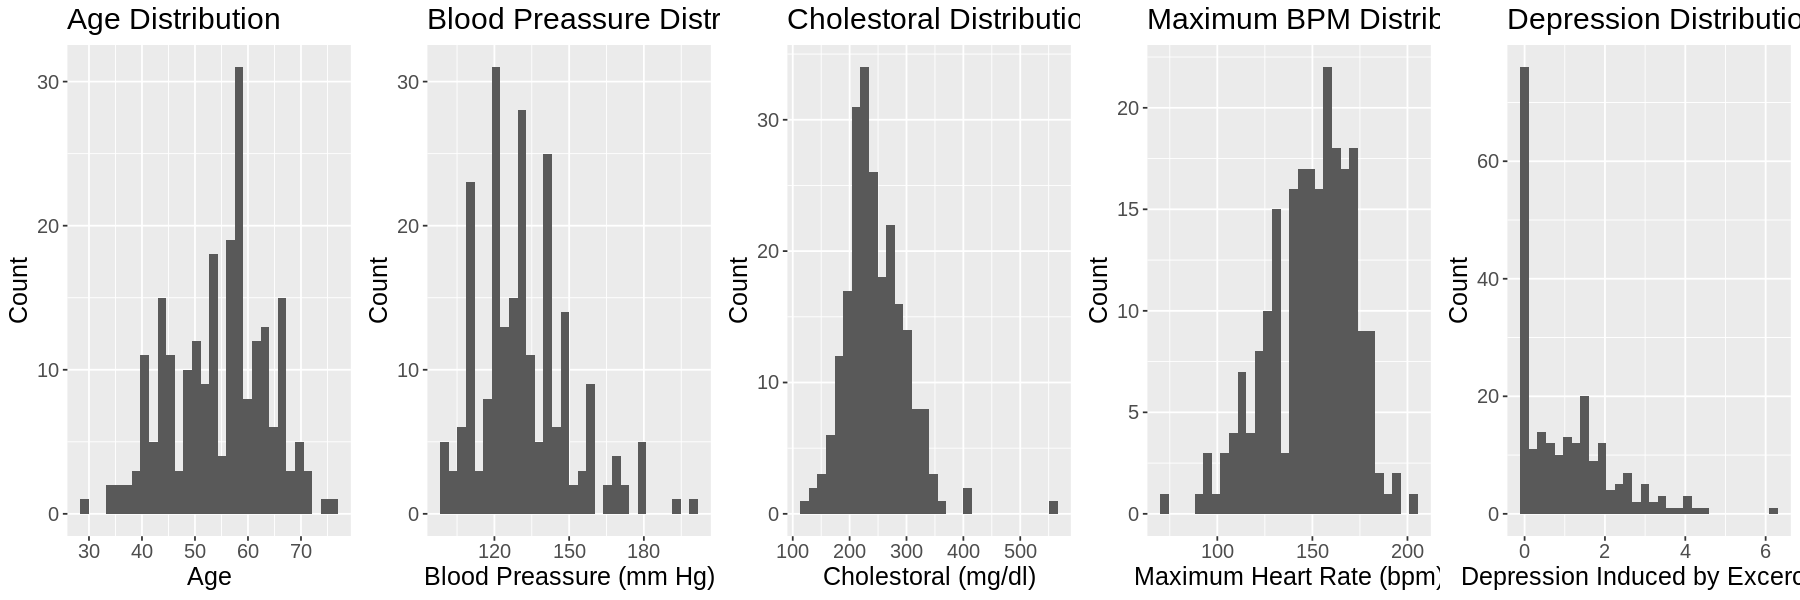

In [40]:
options(repr.plot.width = 15, repr.plot.height = 5)
age_visualization <- training_data |>
    ggplot(aes(x = age)) +
    geom_histogram(position = "identity") +
    labs(x = "Age", y = "Count") +
    ggtitle("Age Distribution") +
    theme(text = element_text(size = 15))
trestbps_visualization <- training_data |>
    ggplot(aes(x = trestbps)) +
    geom_histogram(position = "identity") +
    labs(x = "Blood Preassure (mm Hg)", y = "Count") +
    ggtitle("Blood Preassure Distribution") +
    theme(text = element_text(size = 15))
chol_visualization <- training_data |>
    ggplot(aes(x = chol)) +
    geom_histogram(position = "identity") +
    labs(x = "Cholestoral (mg/dl)", y = "Count") +
    ggtitle("Cholestoral Distribution") +
    theme(text = element_text(size = 15))
thalach_visualization <- training_data |>
    ggplot(aes(x = thalach)) +
    geom_histogram(position = "identity") +
    labs(x = "Maximum Heart Rate (bpm)", y = "Count") +
    ggtitle("Maximum BPM Distribution") +
    theme(text = element_text(size = 15))
oldpeak_visualization <- training_data |>
    ggplot(aes(x = oldpeak)) +
    geom_histogram(position = "identity") +
    labs(x = "Depression Induced by Excercize", y = "Count") +
    ggtitle("Depression Distribution") +
    theme(text = element_text(size = 15))
data_visualization <- plot_grid(age_visualization, trestbps_visualization, chol_visualization, thalach_visualization, oldpeak_visualization, ncol = 5)
data_visualization

### Methods

How will we conduct our data analysis?
* Include prediciton/classification
* Analyze the behaviour of each variable
* Create a prediction model based on the information above
    * Evaluate the accuracy: If it is fairly accurate then those variables are the answer to our main question!
* Use visualizations! Maybe just 1 or 2?
    * I think we should visualize the data for the actual training data, and then on the same plot visualize what our prediction model predicts to compare the differences (hopefully its not that different)

### Expected outcomes and significance

What do we expect to find?
* All of the predictor variables that we used are important/influencial to determining if a patient has heart disease
Impacts of our findings:
* If our model is fairly good, then we can predict if a patient has a disease so that they may seek help immediately.
* However, our model will undoubtedly be less than 100% accurate, so instead of it being a complete scientific diagnosis, it can act as an indicator for concern (spark suspicion concerning the patient's health).
Future questions?
* What other variables could increase the accuracy of this model?
* Can this model be used to predict other health problems?
* How can we incorporate categoric variables into a prediction model? 